In [1]:
import librosa
import pandas as pd
import numpy as np
import noisereduce as nr
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import re
import string
from IPython.display import Audio
import torch


### Loading audio

In [2]:
audio_path='Dataset/data/0afEfN_839.mp3'
y,sr=librosa.load(audio_path)

In [3]:
y

array([-0.09082846, -0.20175666, -0.26899123, ...,  0.47451907,
        0.46566895,  0.23209009], dtype=float32)

In [4]:
sr

22050

### Preprocessing and EDA

In [5]:
Audio(y, rate=sr)

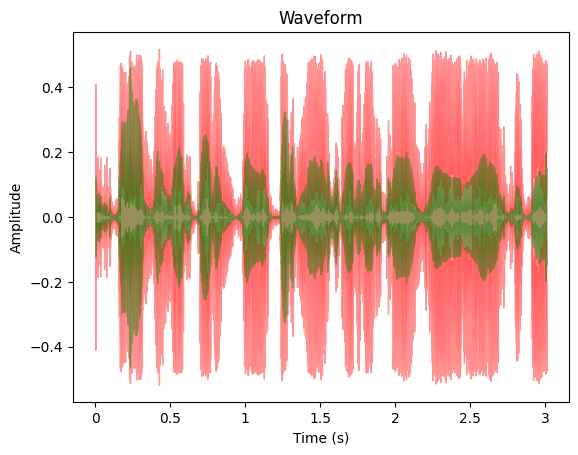

<Figure size 640x480 with 0 Axes>

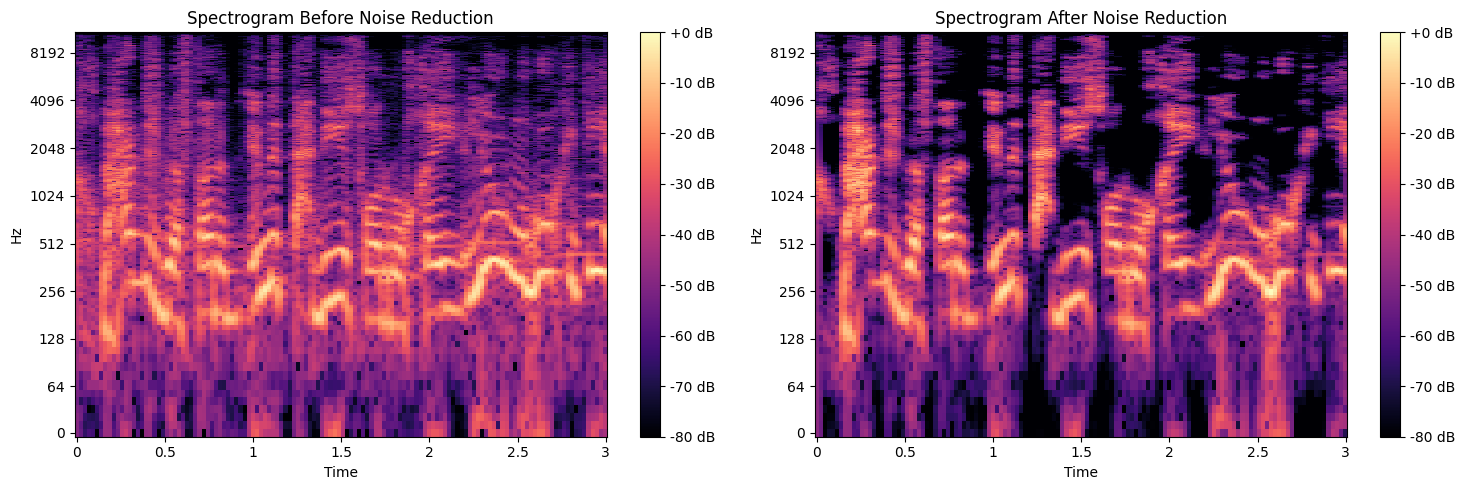

In [6]:
FIG_SIZE = (5, 5)
y_reduced = nr.reduce_noise(y, sr)
librosa.display.waveshow(y, alpha=0.4, color='r')
librosa.display.waveshow(y_reduced, alpha=0.4, color='g')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()
plt.subplots_adjust(left=0.0, right=1.0, top=1.0, bottom=0.0)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img1 = librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log', ax=axes[0])
axes[0].set_title("Spectrogram Before Noise Reduction")
fig.colorbar(img1, ax=axes[0], format='%+2.0f dB')


D_reduced = librosa.amplitude_to_db(np.abs(librosa.stft(y_reduced)), ref=np.max)
img2 = librosa.display.specshow(D_reduced, sr=sr, x_axis='time', y_axis='log', ax=axes[1])
axes[1].set_title("Spectrogram After Noise Reduction")
fig.colorbar(img2, ax=axes[1], format='%+2.0f dB')
plt.tight_layout()
plt.show()

In [7]:
print("Shape of Initial Data : "+ str(y.shape))
#Audio is Monophonic as it is from a sigle channel eliminating the complexity of processing/cleaning higher dimensional audios

Shape of Initial Data : (66327,)


Original Sampling Rate : 22050 Hz


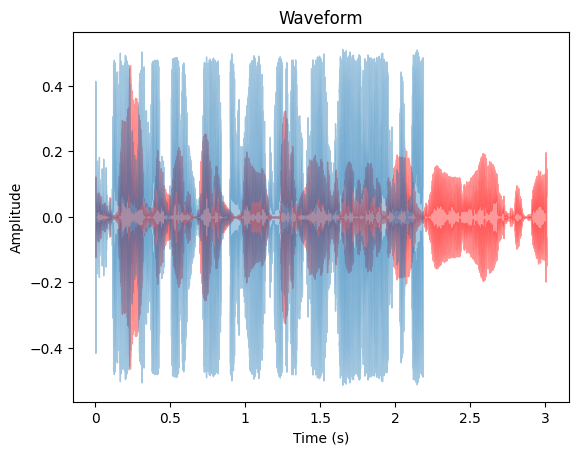

rate after downsampling : 16000


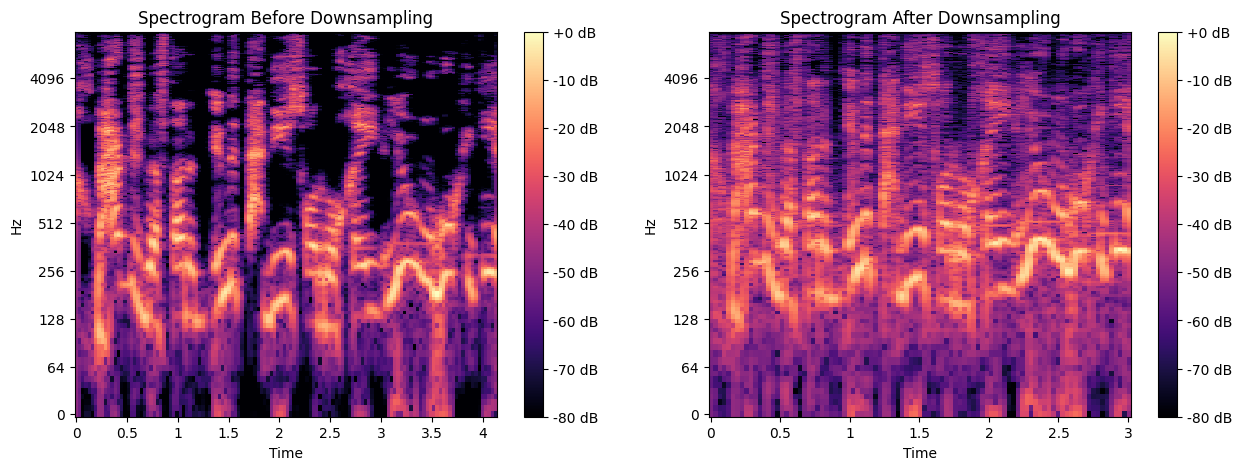

In [8]:
print("Original Sampling Rate : "+str(sr)+" Hz")
target_sr = 16000
y_downsampled=librosa.resample(y,orig_sr=sr,target_sr=target_sr)
Fig_SIZE = (10, 5)
librosa.display.waveshow(y_reduced,  alpha=0.4,color='r')
librosa.display.waveshow(y_downsampled,  alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()
print("rate after downsampling : "+ str(target_sr))
Audio(y_downsampled, rate=target_sr)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
D_reduced = librosa.amplitude_to_db(np.abs(librosa.stft(y_reduced)), ref=np.max)
D_downsampled = librosa.amplitude_to_db(np.abs(librosa.stft(y_downsampled)), ref=np.max)


img1 = librosa.display.specshow(D_reduced, sr=16000, x_axis='time', y_axis='log', ax=axes[0])
axes[0].set_title("Spectrogram Before Downsampling")
fig.colorbar(img1, ax=axes[0], format='%+2.0f dB')


img2 = librosa.display.specshow(D_downsampled, sr=16000, x_axis='time', y_axis='log', ax=axes[1])
axes[1].set_title("Spectrogram After Downsampling")
fig.colorbar(img2, ax=axes[1], format='%+2.0f dB')
Audio(y_downsampled, rate=target_sr)

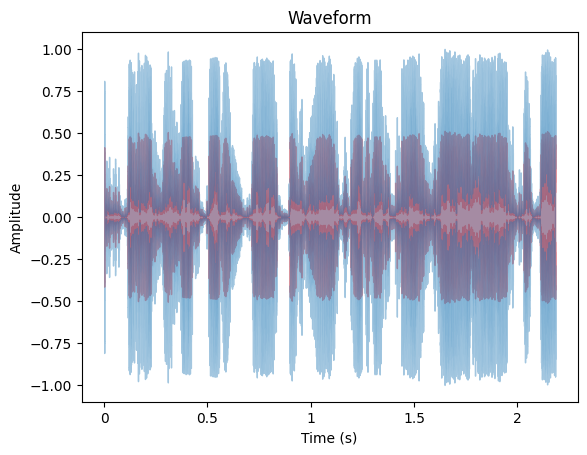

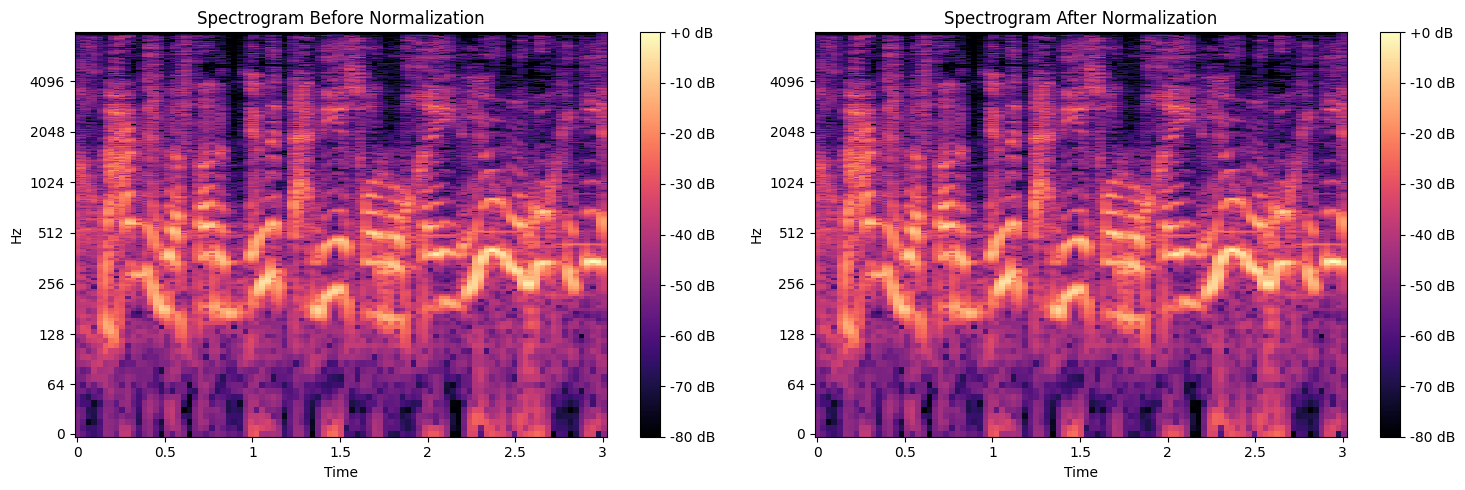

In [9]:
#Normalizing waveform
y_normalized=librosa.util.normalize(y_downsampled)
librosa.display.waveshow(y_downsampled,  alpha=0.4,color='r')
librosa.display.waveshow(y_normalized,  alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()
Audio(y_normalized, rate=target_sr)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
D_downsampled = librosa.amplitude_to_db(np.abs(librosa.stft(y_downsampled)), ref=np.max)
D_normalized = librosa.amplitude_to_db(np.abs(librosa.stft(y_normalized)), ref=np.max)

img1 = librosa.display.specshow(D_downsampled, sr=16000, x_axis='time', y_axis='log', ax=axes[0])
axes[0].set_title("Spectrogram Before Normalization")
fig.colorbar(img1, ax=axes[0], format='%+2.0f dB')

img2 = librosa.display.specshow(D_normalized, sr=16000, x_axis='time', y_axis='log', ax=axes[1])
axes[1].set_title("Spectrogram After Normalization")
fig.colorbar(img2, ax=axes[1], format='%+2.0f dB')

plt.tight_layout()
plt.show()

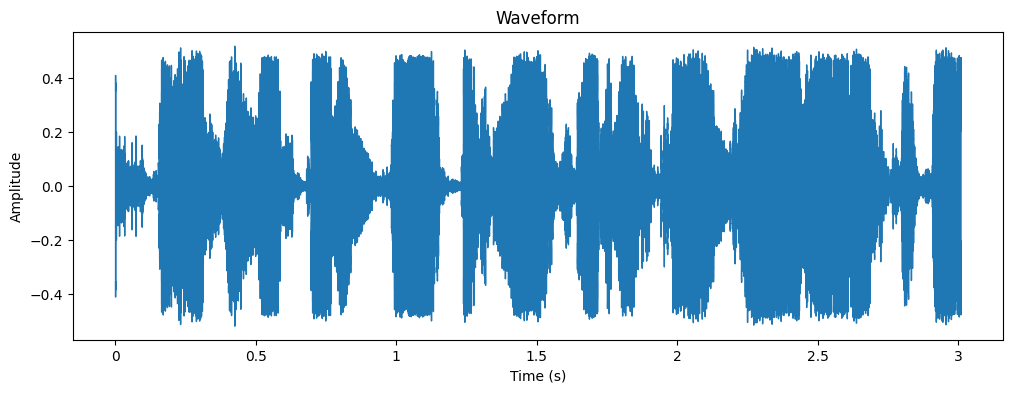

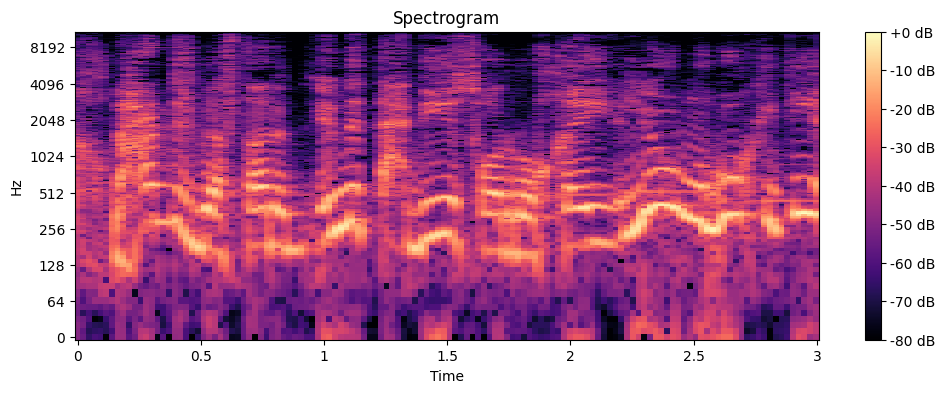

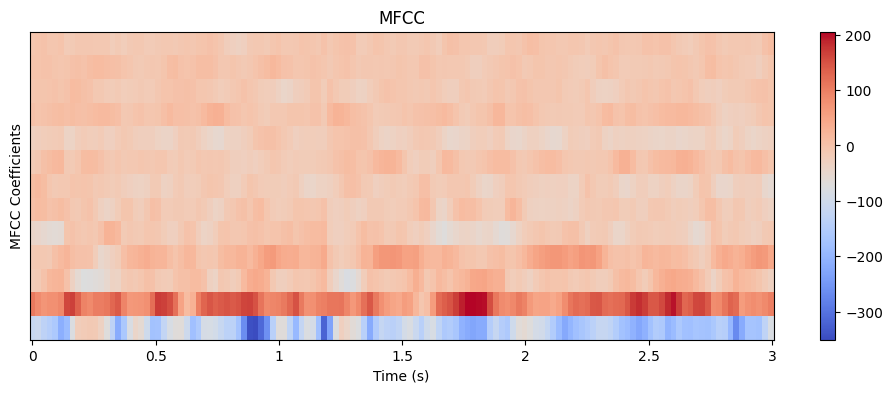

[[-1.14964752e+02 -1.08653702e+02 -1.32803986e+02 ... -1.74825119e+02
  -1.30571259e+02 -8.33428802e+01]
 [ 1.06678185e+02  8.39933548e+01  7.21340485e+01 ...  7.51112366e+01
   8.69554291e+01  9.95103607e+01]
 [-2.03864594e+01 -1.49944830e+01 -2.01978564e-01 ... -3.71455765e+00
  -1.71426296e+01 -3.01368790e+01]
 ...
 [-6.31051254e+00 -5.23331404e+00 -3.61299062e+00 ...  2.93303251e-01
   2.13657284e+00 -4.83103561e+00]
 [-1.22358060e+00 -1.29350185e+00 -1.00308180e-01 ... -2.50336380e+01
  -1.19562168e+01 -4.32031822e+00]
 [-5.87814760e+00 -1.66252124e+00  1.20004714e-02 ... -1.45548592e+01
   2.72207880e+00  9.98209476e+00]]


In [10]:
# 2. Plot the raw waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# 3. Plot the Spectrogram (FFT)
D = np.abs(librosa.stft(y))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

# 4. Plot the MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.ylabel('MFCC Coefficients')
plt.xlabel('Time (s)')
plt.show()
print(mfccs)

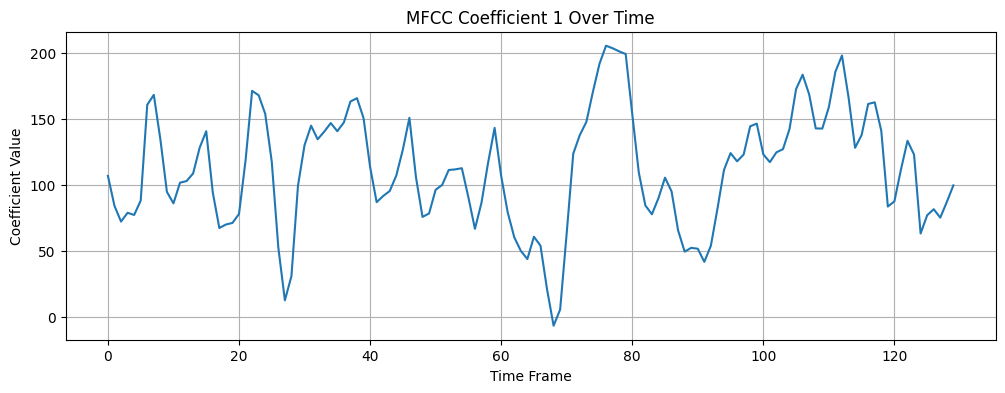

In [11]:
# Pick one MFCC coefficient (e.g., the 1st one)
mfcc1 = mfccs[1]  # 0th index = 1st MFCC

# Plot it over time
plt.figure(figsize=(12, 4))
plt.plot(mfcc1)
plt.title('MFCC Coefficient 1 Over Time')
plt.xlabel('Time Frame')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


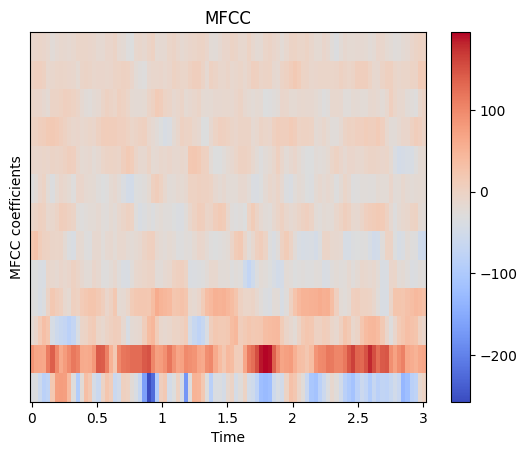

array([[-35.312283  , -32.992287  , -58.68783   , ..., -77.446915  ,
        -14.113948  ,  -1.2034707 ],
       [ 86.53883   ,  68.474365  ,  67.716934  , ...,  51.668877  ,
         63.809097  ,  68.04411   ],
       [-19.247608  ,  -8.973034  ,  14.347374  , ...,  25.426125  ,
          0.3328641 ,  -9.295185  ],
       ...,
       [ -7.63251   ,  -7.9899    ,  -8.832757  , ..., -27.646542  ,
        -10.71559   ,  -3.8337803 ],
       [  1.2091432 ,   5.864823  ,   4.5712175 , ...,  -3.728157  ,
         14.129568  ,  13.060644  ],
       [-10.6127205 ,  -9.438756  ,  -6.6899633 , ...,  -4.1819334 ,
         -0.59809697,  -1.9537344 ]], dtype=float32)

In [12]:
#Extracting MFCC and plotting
mfccs = librosa.feature.mfcc(y=y_normalized, sr=target_sr, n_mfcc=13)
FIG_SIZE=(10,5)
librosa.display.specshow(mfccs, sr=target_sr, x_axis='time')
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCC")
plt.show()
mfccs


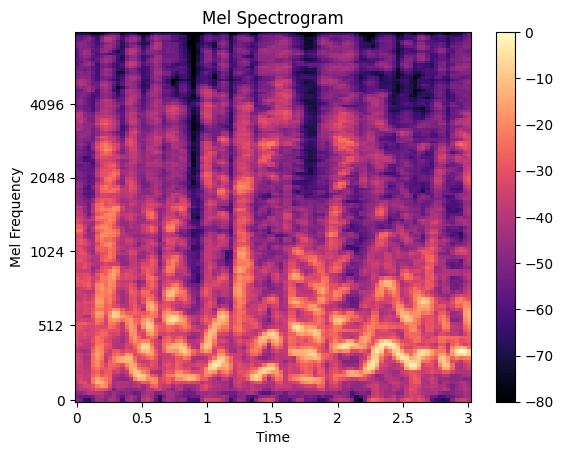

In [13]:
#MEL SPECTROGRAM
mel_spectrogram = librosa.feature.melspectrogram(y=y_normalized, sr=target_sr)
librosa.display.specshow(librosa.power_to_db(mel_spectrogram, ref=np.max), sr=target_sr, x_axis='time', y_axis='mel')
plt.xlabel("Time")
plt.ylabel("Mel Frequency")
plt.colorbar()
plt.title("Mel Spectrogram")
plt.show()
Audio(y_normalized, rate=target_sr)

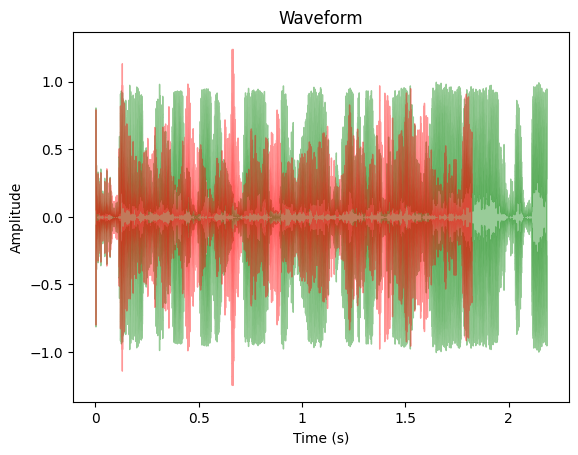

In [14]:
#Time masking
time_masked = librosa.effects.time_stretch(y_normalized, rate=1.2)
librosa.display.waveshow(y_normalized,  alpha=0.4,color='g')
librosa.display.waveshow(time_masked,  alpha=0.4,color='r')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.show()
Audio(time_masked, rate=target_sr)

### Processing Transcriptions 

In [15]:
import pandas as pd

In [16]:
df=pd.read_csv('Dataset/index.csv')

In [17]:
audio_path

'Dataset/data/0afEfN_839.mp3'

In [18]:
transcription = df[df['audio_file'] == audio_path.split('/')[-1]]['text'].iloc[0]
transcription

'ما حدش بيفترض إن التحديث والرقي\nليهم وجوه كتيرة،'

### Text to semantic modeling

In [19]:
from num2words import num2words
import re
def sentence_preprocessing(sentence):
    sentence = sentence.lower()
    sentence = sentence.replace("\n", " ")
    sentence = re.sub(r'[إأآ]', 'ا', sentence)
    sentence = re.sub(r'[^a-zA-Zء-ي\s\d]', '', sentence)
    pattern = r'[\u0617-\u061A\u064B-\u065F]'
    sentence = re.sub(pattern, '', sentence)
    pattern = r'([a-zA-Z])([ء-ي])|([ء-ي])([a-zA-Z])'
    sentence = re.sub(pattern, r'\1\3 \2\4', sentence)
    sentence = re.sub(r'\s+', ' ', sentence)
    sentence = re.sub(r'\d+', lambda x: num2words(int(x.group()), lang='ar'), sentence)
    return sentence
# Apply the function to each sentence \in the array
modified_transcription = [sentence_preprocessing(transcription)]
#why when  running it once some patterns does not fully applied to the text?
modified_transcription = [sentence_preprocessing(transcription) ] 

In [20]:
modified_transcription

['ما حدش بيفترض ان التحديث والرقي ليهم وجوه كتيرة']

In [21]:
import string
special_tokens = ['<PAD>', '<UNK>', '<SOS>', '<EOS>'] 
english_characters = list(string.ascii_lowercase + ' ')  
arabic_characters = list("ابتثجحخدذرزسشصضطظعغفقكلمنهويئءىةؤ") 

characters = english_characters + arabic_characters
vocab = special_tokens + characters 

char2idx = {char: idx for idx, char in enumerate(vocab)}
idx2char = {idx: char for idx, char in enumerate(vocab)}

vocab_size = len(vocab)
print(f"Vocabulary size: {vocab_size}")

print(vocab)

Vocabulary size: 64
['<PAD>', '<UNK>', '<SOS>', '<EOS>', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', 'ا', 'ب', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'ئ', 'ء', 'ى', 'ة', 'ؤ']


In [22]:
char2idx

{'<PAD>': 0,
 '<UNK>': 1,
 '<SOS>': 2,
 '<EOS>': 3,
 'a': 4,
 'b': 5,
 'c': 6,
 'd': 7,
 'e': 8,
 'f': 9,
 'g': 10,
 'h': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'p': 19,
 'q': 20,
 'r': 21,
 's': 22,
 't': 23,
 'u': 24,
 'v': 25,
 'w': 26,
 'x': 27,
 'y': 28,
 'z': 29,
 ' ': 30,
 'ا': 31,
 'ب': 32,
 'ت': 33,
 'ث': 34,
 'ج': 35,
 'ح': 36,
 'خ': 37,
 'د': 38,
 'ذ': 39,
 'ر': 40,
 'ز': 41,
 'س': 42,
 'ش': 43,
 'ص': 44,
 'ض': 45,
 'ط': 46,
 'ظ': 47,
 'ع': 48,
 'غ': 49,
 'ف': 50,
 'ق': 51,
 'ك': 52,
 'ل': 53,
 'م': 54,
 'ن': 55,
 'ه': 56,
 'و': 57,
 'ي': 58,
 'ئ': 59,
 'ء': 60,
 'ى': 61,
 'ة': 62,
 'ؤ': 63}

In [23]:
idx2char

{0: '<PAD>',
 1: '<UNK>',
 2: '<SOS>',
 3: '<EOS>',
 4: 'a',
 5: 'b',
 6: 'c',
 7: 'd',
 8: 'e',
 9: 'f',
 10: 'g',
 11: 'h',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'p',
 20: 'q',
 21: 'r',
 22: 's',
 23: 't',
 24: 'u',
 25: 'v',
 26: 'w',
 27: 'x',
 28: 'y',
 29: 'z',
 30: ' ',
 31: 'ا',
 32: 'ب',
 33: 'ت',
 34: 'ث',
 35: 'ج',
 36: 'ح',
 37: 'خ',
 38: 'د',
 39: 'ذ',
 40: 'ر',
 41: 'ز',
 42: 'س',
 43: 'ش',
 44: 'ص',
 45: 'ض',
 46: 'ط',
 47: 'ظ',
 48: 'ع',
 49: 'غ',
 50: 'ف',
 51: 'ق',
 52: 'ك',
 53: 'ل',
 54: 'م',
 55: 'ن',
 56: 'ه',
 57: 'و',
 58: 'ي',
 59: 'ئ',
 60: 'ء',
 61: 'ى',
 62: 'ة',
 63: 'ؤ'}

In [24]:
def tokenize_text(text, char2idx, max_len=120, start_token=True, end_token=True):
    tokens = [char2idx.get(char, char2idx['<UNK>']) for char in text]

    if start_token:
        tokens.insert(0, char2idx['<SOS>'])
    if end_token:
        tokens.append(char2idx['<EOS>'])

    if max_len is not None:
        tokens = tokens[:max_len]  
        tokens += [char2idx['<PAD>']] * (max_len - len(tokens))  

    return tokens

# Example tokenization
sentence = transcription
tokens = tokenize_text(sentence, char2idx, max_len = 120)
print(tokens)

[2, 54, 31, 30, 36, 38, 43, 30, 32, 58, 50, 33, 40, 45, 30, 1, 55, 30, 31, 53, 33, 36, 38, 58, 34, 30, 57, 31, 53, 40, 51, 58, 1, 53, 58, 56, 54, 30, 57, 35, 57, 56, 30, 52, 33, 58, 40, 62, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [25]:
import tensorflow as tf
def TextDecoder(sentence):
    out = ''
    for token in sentence:
        if isinstance(token, tf.Tensor):
            token = token.numpy().item()
        char = idx2char[token]
        if char == '<EOS>':
            return out
        if not (char in special_tokens):
            out += char
    return out

TextDecoder(tokens)

/Users/maryamsaad/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


'ما حدش بيفترض ن التحديث والرقيليهم وجوه كتيرة'

In [26]:
from sentence_transformers import SentenceTransformer
model =SentenceTransformer('sentence-transformers/all-mpnet-base-v2', device='mps',cache_folder='embedding_model_cache')    
sentence = ''.join([idx2char[token] for token in tokens if token in idx2char and idx2char[token] not in special_tokens])
embedding = model.encode(sentence)
print(embedding.shape)
print(embedding)


(768,)
[ 1.10097229e-02  2.13754009e-02 -1.36627136e-02 -3.95871419e-03
 -4.25865240e-02  7.59861851e-03  6.00237865e-03  4.07062359e-02
  3.94843183e-02 -1.30402315e-02  2.99156811e-02 -4.04632417e-03
  3.41372080e-02 -2.08183136e-02  1.19597334e-02 -2.46172841e-03
  1.56056499e-02 -1.48048373e-02  1.70951486e-02 -5.35905501e-03
 -5.85070718e-03  2.87510883e-02  3.24119884e-03  2.27927212e-02
  2.06005177e-03 -2.06329692e-02  4.69690673e-02 -4.52585407e-02
  8.15599319e-03  3.48708928e-02  4.48078401e-02 -3.11238249e-03
 -2.17683148e-03 -5.64317405e-02  2.69985594e-06 -5.98261468e-02
 -1.59205403e-03 -1.80539116e-02 -1.09676234e-02 -9.44166072e-03
  1.02219321e-02 -4.54064757e-02 -2.40502339e-02 -2.90859286e-02
  3.56167965e-02  1.16707748e-02  3.66465747e-02  1.12668008e-01
  5.90517037e-02  2.65109465e-02  1.79779455e-02 -2.39416398e-02
 -2.22479030e-02 -2.40798034e-02  8.52017384e-03  2.15602443e-02
  1.14787919e-02  1.27336113e-02 -3.89307290e-02  4.05731089e-02
 -1.18652768e-02  

In [27]:
embedding

array([ 1.10097229e-02,  2.13754009e-02, -1.36627136e-02, -3.95871419e-03,
       -4.25865240e-02,  7.59861851e-03,  6.00237865e-03,  4.07062359e-02,
        3.94843183e-02, -1.30402315e-02,  2.99156811e-02, -4.04632417e-03,
        3.41372080e-02, -2.08183136e-02,  1.19597334e-02, -2.46172841e-03,
        1.56056499e-02, -1.48048373e-02,  1.70951486e-02, -5.35905501e-03,
       -5.85070718e-03,  2.87510883e-02,  3.24119884e-03,  2.27927212e-02,
        2.06005177e-03, -2.06329692e-02,  4.69690673e-02, -4.52585407e-02,
        8.15599319e-03,  3.48708928e-02,  4.48078401e-02, -3.11238249e-03,
       -2.17683148e-03, -5.64317405e-02,  2.69985594e-06, -5.98261468e-02,
       -1.59205403e-03, -1.80539116e-02, -1.09676234e-02, -9.44166072e-03,
        1.02219321e-02, -4.54064757e-02, -2.40502339e-02, -2.90859286e-02,
        3.56167965e-02,  1.16707748e-02,  3.66465747e-02,  1.12668008e-01,
        5.90517037e-02,  2.65109465e-02,  1.79779455e-02, -2.39416398e-02,
       -2.22479030e-02, -

### processed vs unprocessed audios

In [28]:
import random
processed_audios = os.listdir('processed_audio')
unprocessed_audios = os.listdir('Dataset/data')

common_audios = []
count = 0
for audio in processed_audios:
    count +=1
    if audio.replace('processed_', '') in unprocessed_audios:
        common_audios.append(audio)
    if count == 90:
        break

common_processed = random.sample(common_audios, min(30, len(common_audios)))
print(common_processed)


['processed_Td6aG9_551.mp3', 'processed_aCLFfA_241.mp3', 'processed_kSO8dl_1709.mp3', 'processed_KjZ0yl_93.mp3', 'processed_spV3u2_22.mp3', 'processed_fN9u5K_234.mp3', 'processed_IrcvW6_172.mp3', 'processed_9sXnT5_238.mp3', 'processed_ONOkGY_1318.mp3', 'processed_1Fzq2l_495.mp3', 'processed_n019JV_781.mp3', 'processed_wPTBh1_250.mp3', 'processed_hKj7cM_2212.mp3', 'processed_SzX3S6_814.mp3', 'processed_lpA8BV_1139.mp3', 'processed_E4wk1F_994.mp3', 'processed_eXkbJN_1345.mp3', 'processed_m10fSD_238.mp3', 'processed_tL7zfB_55.mp3', 'processed_u78wT0_935.mp3', 'processed_EEy5WV_753.mp3', 'processed_VEaCLK_185.mp3', 'processed_ATTq9v_389.mp3', 'processed_332mXf_365.mp3', 'processed_PhZFIZ_1.mp3', 'processed_mYMT0a_1542.mp3', 'processed_wbiDaE_240.mp3', 'processed_QUOtWP_12.mp3', 'processed_REYXqY_401.mp3', 'processed_NdzBby_850.mp3']


In [29]:
def show_noise_reduce(audio_path):
    y, sr = librosa.load(audio_path)
    y_reduced = nr.reduce_noise(y, sr)
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b', label='Original')
    librosa.display.waveshow(y_reduced, sr=sr, alpha=0.5, color='r', label='Noise-Reduced')
    plt.legend()
    plt.title('Noise Reduction')
    plt.show()

def show_downsampling(audio_path):
    y, sr = librosa.load(audio_path)
    y_downsampled = librosa.resample(y, orig_sr=sr, target_sr=16000)
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b', label='Original')
    librosa.display.waveshow(y_downsampled, sr=16000, alpha=0.5, color='r', label='Downsampled')
    plt.legend()
    plt.title('Downsampling')
    plt.show()
def show_normalization(audio_path):
    y, sr = librosa.load(audio_path)
    y_normalized = librosa.util.normalize(y)
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b', label='Original')
    librosa.display.waveshow(y_normalized, sr=sr, alpha=0.5, color='r', label='Normalized')
    plt.legend()
    plt.title('Normalization')
    plt.show()




In [30]:
!pip3 install ipython

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip



=== Processing processed_332mXf_365.mp3 ===
Showing noise reduction effect:


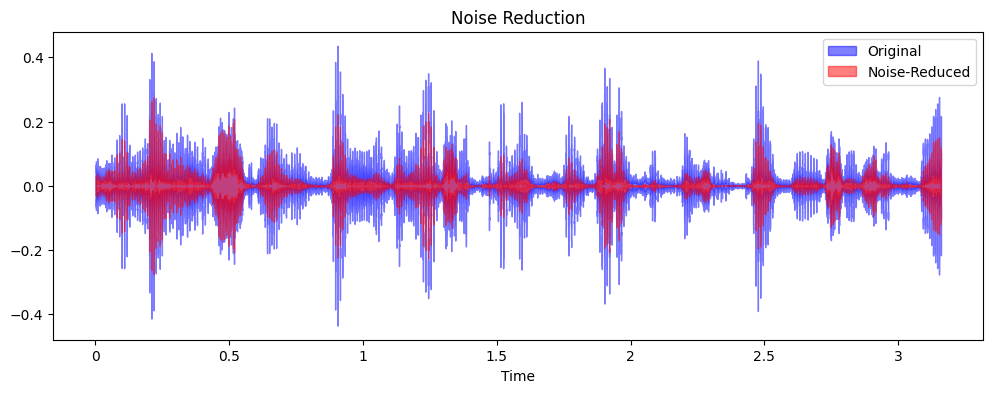

Showing downsampling effect:


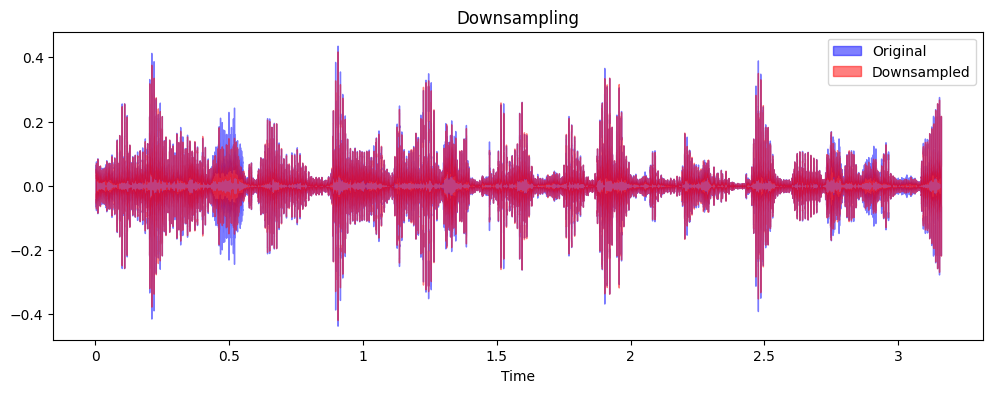

Showing normalization effect:


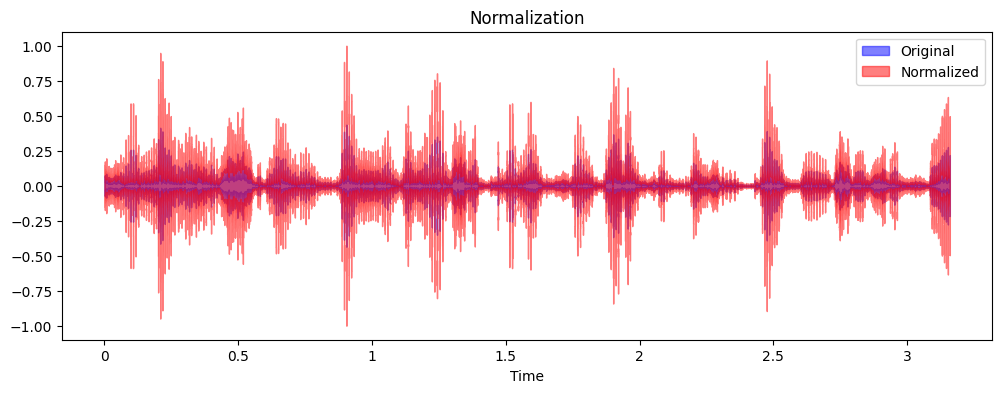

Comparing original vs fully processed audio:


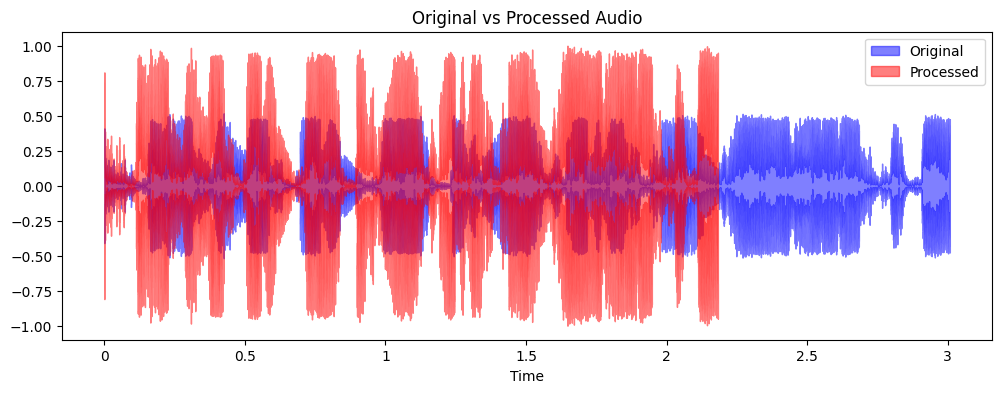


=== Processing processed_PhZFIZ_1.mp3 ===
Showing noise reduction effect:


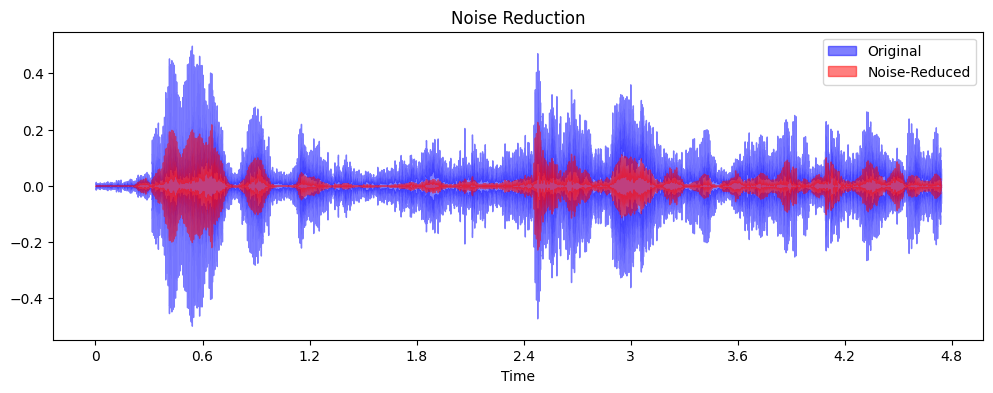

Showing downsampling effect:


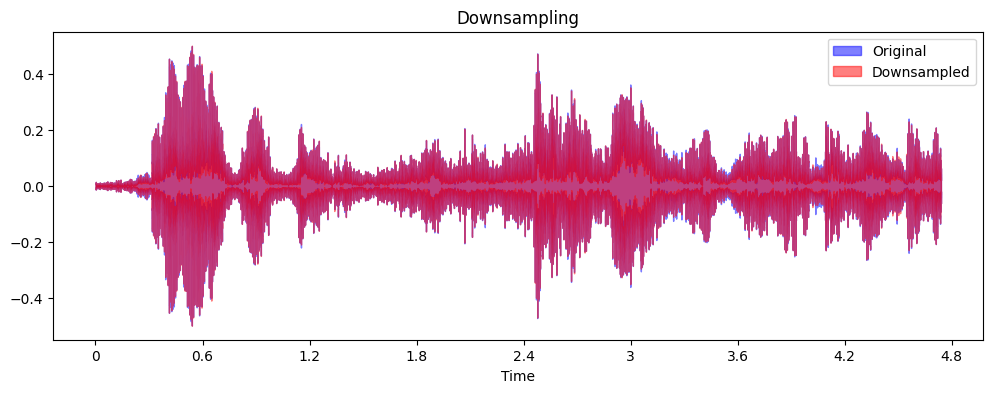

Showing normalization effect:


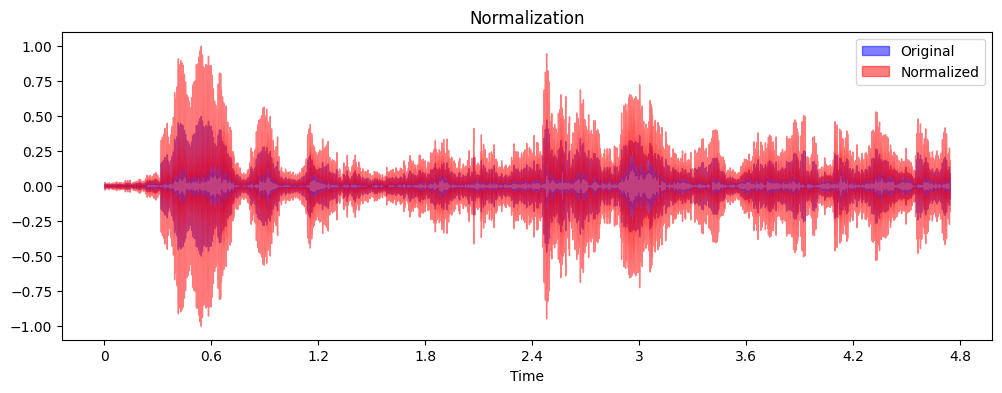

Comparing original vs fully processed audio:


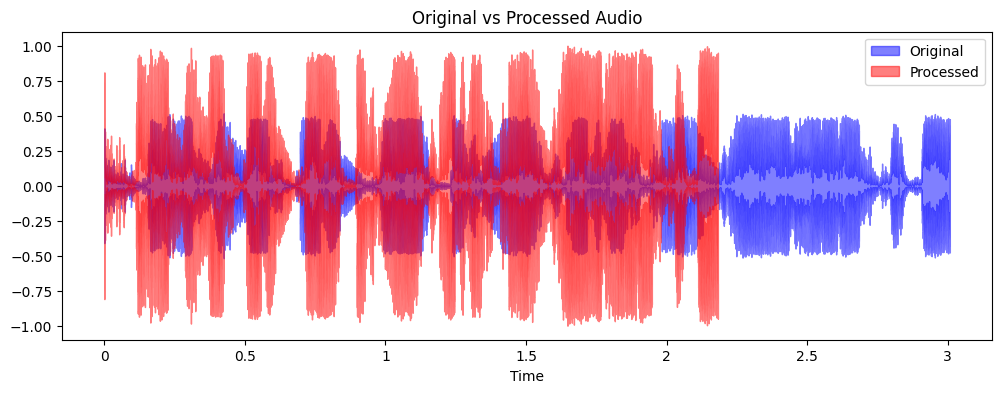


=== Processing processed_mYMT0a_1542.mp3 ===
Showing noise reduction effect:


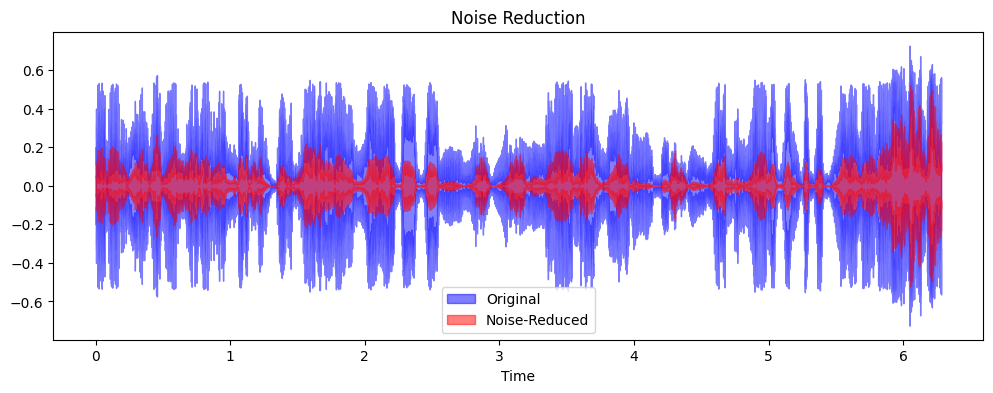

Showing downsampling effect:


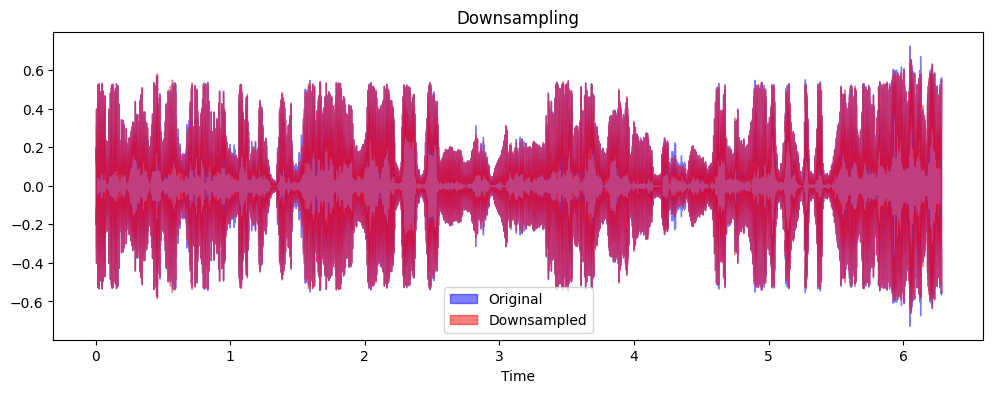

Showing normalization effect:


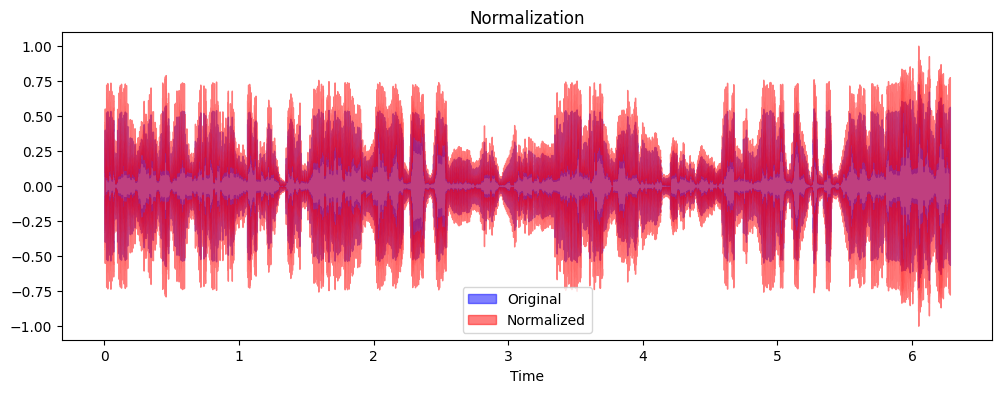

Comparing original vs fully processed audio:


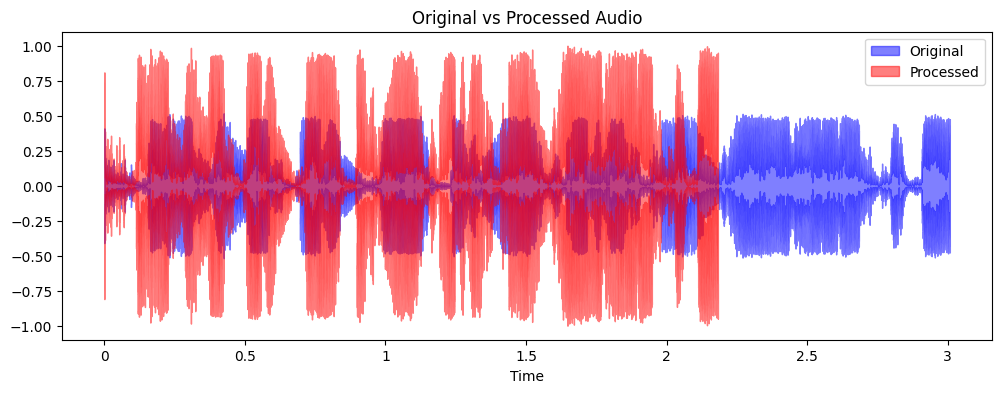


=== Processing processed_wbiDaE_240.mp3 ===
Showing noise reduction effect:


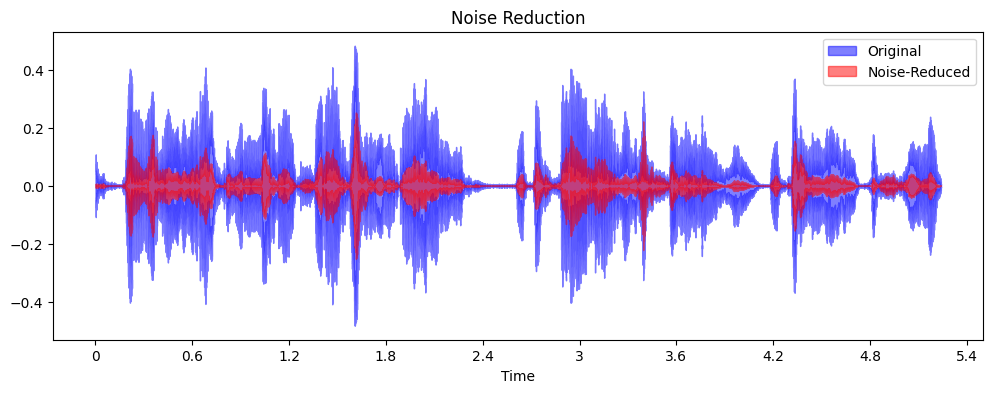

Showing downsampling effect:


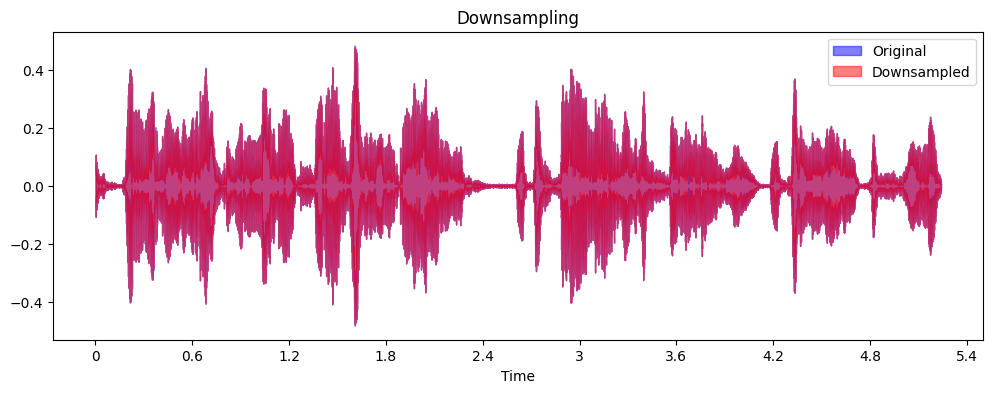

Showing normalization effect:


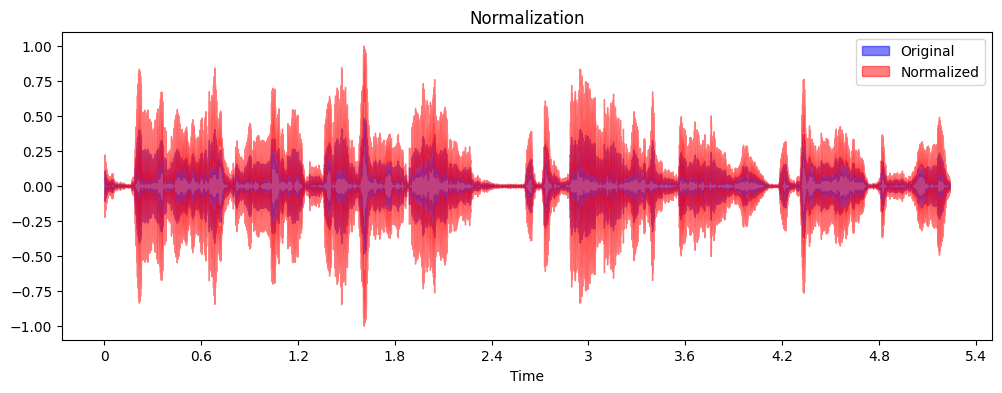

Comparing original vs fully processed audio:


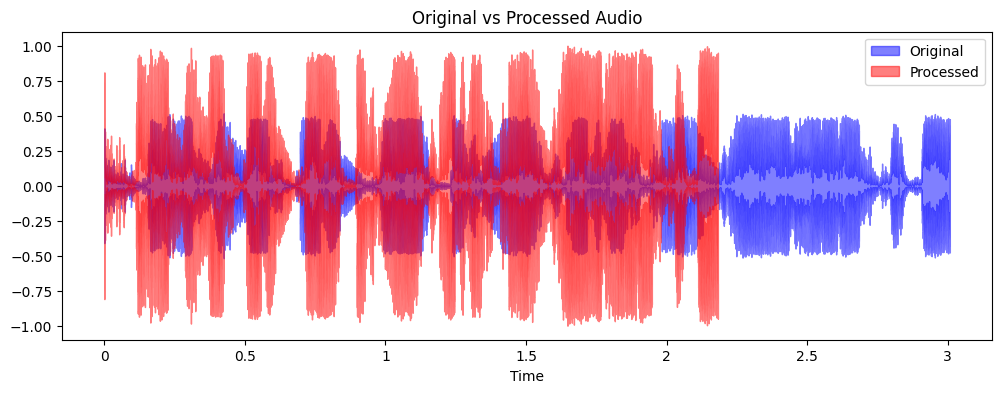


=== Processing processed_QUOtWP_12.mp3 ===
Showing noise reduction effect:


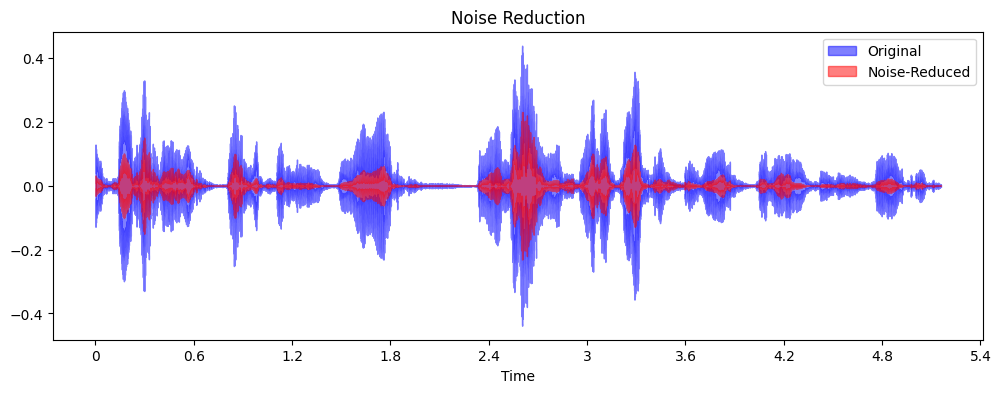

Showing downsampling effect:


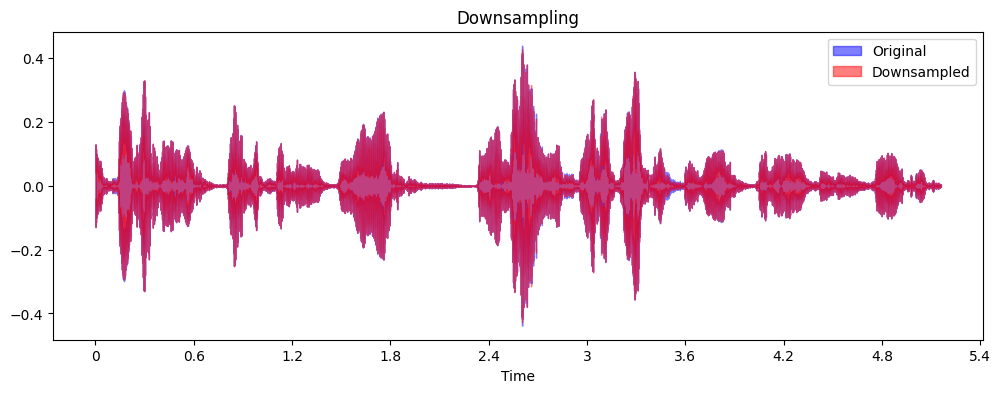

Showing normalization effect:


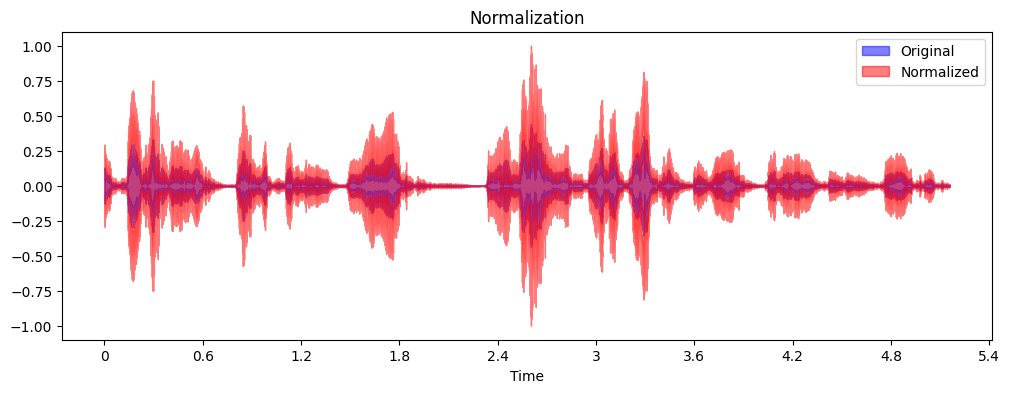

Comparing original vs fully processed audio:


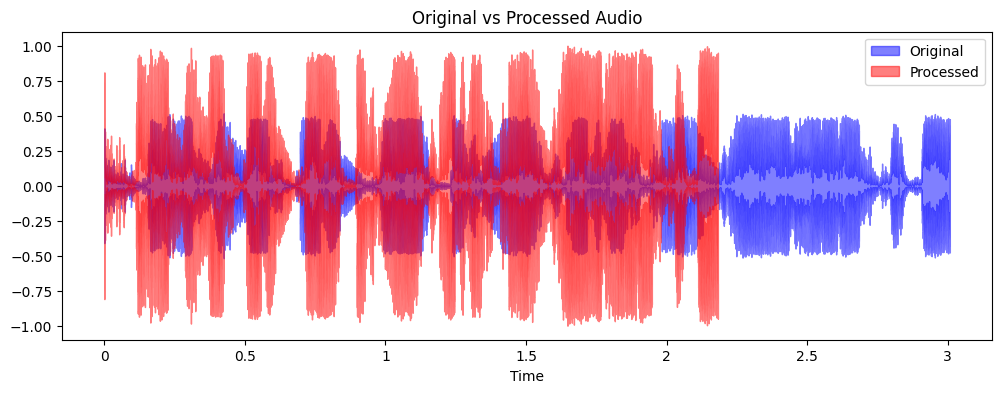

In [31]:
n=5
start=int(np.random.randint(10, len(common_processed) -   n)) 
end = start + n

for audio in common_processed[start:end]: 
    print(f"\n=== Processing {audio} ===")
    processed_path = 'processed_audio/' + audio
    original_path = 'Dataset/data/' + audio.replace('processed_', '')
    
    print("Showing noise reduction effect:")
    show_noise_reduce(original_path)
    
    print("Showing downsampling effect:")
    show_downsampling(original_path)
    
    print("Showing normalization effect:")
    show_normalization(original_path)
    print("Comparing original vs fully processed audio:")
    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(y, sr=sr, alpha=0.5, color='b', label='Original')
    librosa.display.waveshow(y_normalized, sr=sr, alpha=0.5, color='r', label='Processed')
    plt.legend()
    plt.title('Original vs Processed Audio')
    plt.show()
    original_audio,original_sr=librosa.load(original_path)
    processed_audio,processed_sr=librosa.load(processed_path)
    display(Audio(original_audio, rate=original_sr))
    display(Audio(processed_audio, rate=processed_sr))